# Лабораторная работа 1
# Вариант 5
## Румянков Дмитрий Сергеевич
## 17 ВМв

## Метеоритная защита земли

1. Определите местоположение появления метеорита с наибольшим количеством высвободившейся энергии.
2. Определите метеорит с максимальной и минимальной скоростью.
3. Определите место максимальной концентрации метеоритов.
4. Определите время года, в которое вероятность появления метеоритов максимальна. Постройте график.
5. Удалите строки данных, в которых для метеоритов не указана скорость. Выведите размер набора данных до и после удаления.
6. Построить график, на котором по оси ОХ отложено время суток, по OY – частота появления метеоритов.
7. Заполните строки в которых для метеоритов не указана скорость.
8. Определите месяц года, для которого появление метеоритов наиболее вероятно (постройте необходимые графики).
9. Вычислите корреляцию Пирсона и Спирмена между признаками Altitude и Total Radiated Energy. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.


### Импорт

In [1]:
import pandas as pd
import re
import seaborn as sns
import datetime
from scipy import stats
df=pd.read_csv('cneos_fireball_data.csv')

### 1. Определите местоположение появления метеорита с наибольшим количеством высвободившейся энергии.

In [2]:
df[df["Total Radiated Energy (J)"]==df['Total Radiated Energy (J)'].dropna().max()][['Latitude (deg.)','Longitude (deg.)','Altitude (km)']]

,Latitude (deg.),Longitude (deg.),Altitude (km)
146,54.8N,61.1E,23.3


### 2. Определите метеорит с максимальной и минимальной скоростью.

In [3]:
df[df["Velocity (km/s)"] == df["Velocity (km/s)"].max()]

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
67,2015-07-04 01:40:11,38.6N,103.1E,46.3,49.0,0.9,-40.4,-27.7,5.600000e+10,0.18


In [4]:
df[df["Velocity (km/s)"] == df["Velocity (km/s)"].min()]

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
300,2008-07-01 17:40:19,37.1N,115.7W,36.1,9.8,2.8,1.7,-9.2,3.600000e+10,0.12


### 3. Определите место максимальной концентрации метеоритов.

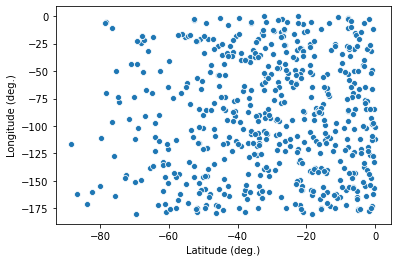

In [5]:
format1 = lambda x: re.sub('.*N',str(x),str(x).replace('N',''))
format2 =lambda x: re.sub('.*S',str(x),'-'+str(x).replace('S',''))
format3 = lambda x: re.sub('.*W',str(x),str(x).replace('W',''))
format4 =lambda x: re.sub('.*E',str(x),'-'+str(x).replace('E',''))
to_float = lambda x: float(x)
column1=df['Latitude (deg.)'].apply(format1).apply(format2).apply(to_float)
column2=df['Longitude (deg.)'].apply(format3).apply(format4).apply(to_float)
d = {'Latitude (deg.)':column1,'Longitude (deg.)':column2}
new_df=pd.DataFrame(d)
new_df
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Latitude (deg.)", y="Longitude (deg.)",
                     palette=cmap,
                     data=new_df)

### 4. Определите время года, в которое вероятность появления метеоритов максимальна. Постройте график.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017B649A8488>]],
      dtype=object)

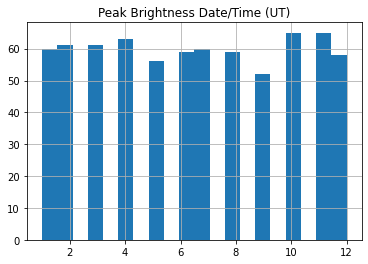

In [6]:
format=lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").month
df2=pd.DataFrame(df['Peak Brightness Date/Time (UT)'].apply(format),columns=['Peak Brightness Date/Time (UT)'])
df2.hist(bins=20)

In [7]:
df2[df2['Peak Brightness Date/Time (UT)']>9].count()

Peak Brightness Date/Time (UT)    188
dtype: int64

In [8]:
df2[(df2['Peak Brightness Date/Time (UT)']>6) & (df2['Peak Brightness Date/Time (UT)']<10)].count()

Peak Brightness Date/Time (UT)    171
dtype: int64

In [9]:
df2[(df2['Peak Brightness Date/Time (UT)']>3) & (df2['Peak Brightness Date/Time (UT)']<7)].count()

Peak Brightness Date/Time (UT)    178
dtype: int64

In [10]:
df2[df2['Peak Brightness Date/Time (UT)']<4].count()

Peak Brightness Date/Time (UT)    182
dtype: int64

### 5. Удалите строки данных, в которых для метеоритов не указана скорость. Выведите размер набора данных до и после удаления.

In [11]:
df['Velocity (km/s)']

0       NaN
1      17.2
2      13.7
3      15.2
4      24.3
       ... 
714     NaN
715     NaN
716     NaN
717     NaN
718     NaN
Name: Velocity (km/s), Length: 719, dtype: float64

In [12]:
df[df['Velocity (km/s)'].notnull()]

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52
5,2017-06-20 13:41:32,54.2S,133.0E,33.3,13.6,8.7,-5.7,8.8,6.360000e+11,1.60
...,...,...,...,...,...,...,...,...,...,...
450,2004-04-22 04:21:49,44.3S,83.3E,29.6,16.3,8.5,-12.1,-6.8,6.240000e+11,1.50
451,2004-04-06 03:24:49,12.0S,162.8E,35.0,25.6,10.5,-23.2,-2.9,4.330000e+11,1.10
462,2003-11-10 13:54:06,64.5S,136.2E,23.0,20.1,14.8,-8.7,10.4,5.180000e+11,1.30
467,2003-09-27 12:59:02,21.0N,86.6E,26.0,18.2,-1.0,-5.4,-17.3,2.150000e+12,4.60


In [13]:
df=pd.read_csv('cneos_fireball_data.csv')

### 6. Построить график, на котором по оси ОХ отложено время суток, по OY – частота появления метеоритов.

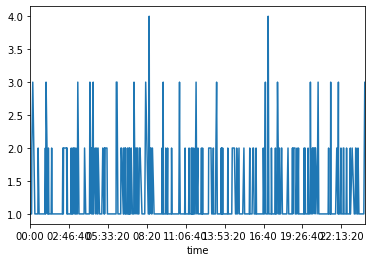

In [14]:
format=lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").time().replace(second=0, microsecond=0)
df3=pd.DataFrame(df['Peak Brightness Date/Time (UT)'].apply(format),columns=['Peak Brightness Date/Time (UT)'])
df3['Peak Brightness Date/Time (UT)'].value_counts().plot()

### 7. Заполните строки в которых для метеоритов не указана скорость.

In [16]:
df[df['Velocity (km/s)'].isnull()]=100
df[df['Velocity (km/s)'].isnull()]

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)


In [17]:
df=pd.read_csv('cneos_fireball_data.csv')

### 8. Определите месяц года, для которого появление метеоритов наиболее вероятно (постройте необходимые графики).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017B64A95F88>]],
      dtype=object)

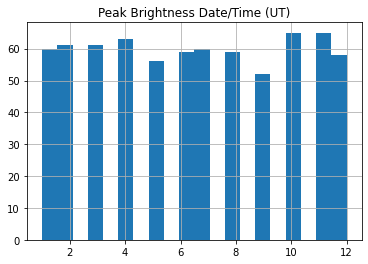

In [18]:
df2['Peak Brightness Date/Time (UT)'].value_counts()
df2.hist(bins=20)

### 9. Вычислите корреляцию Пирсона и Спирмена между признаками Altitude и Total Radiated Energy. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [21]:
stats.spearmanr(df['Altitude (km)'], df['Total Radiated Energy (J)'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.12671041939219074, pvalue=0.026415728610676672)

In [47]:
import numpy as np
np.corrcoef(df['Altitude (km)'], df['Total Radiated Energy (J)'])

array([[nan, nan],
       [nan,  1.]])

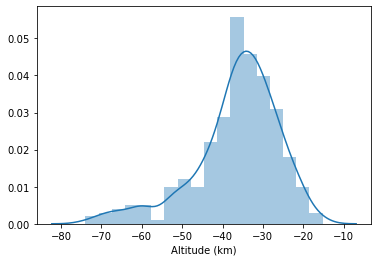

In [57]:
column=df['Altitude (km)'].apply(format1).apply(format2).apply(to_float)
d = {'Altitude (km)':column}
check=pd.DataFrame(d)
check=check[check['Altitude (km)'].notnull()]
sns.distplot(check['Altitude (km)'])

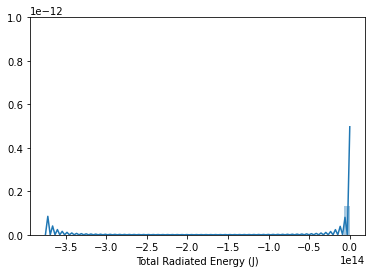

In [58]:
column=df['Total Radiated Energy (J)'].apply(format1).apply(format2).apply(to_float)
d = {'Total Radiated Energy (J)':column}
check=pd.DataFrame(d)
check=check[check['Total Radiated Energy (J)'].notnull()]
sns.distplot(check['Total Radiated Energy (J)'])